# AI Lab 7 Q2 Meher Shrishti Nigam 20BRS1193

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [72]:
dt = pd.read_csv("iris.csv")
dt.drop('Id', inplace=True, axis = 1)
print(dt[:5])

dt = dt.sample(frac = 1)
print(dt[:5])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
7              5.0           3.4            1.5           0.2      Iris-setosa
125            7.2           3.2            6.0           1.8   Iris-virginica
119            6.0           2.2            5.0           1.5   Iris-virginica
55             5.7           2.8            4.5           1.3  Iris-versicolor
13             4.3           3.0            1.1           0.1      Iris-setosa


Text(0, 0.5, 'Number')

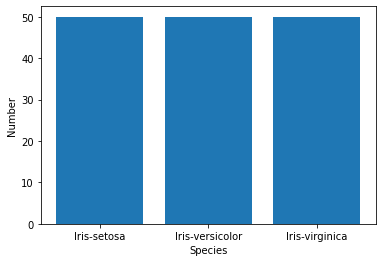

In [73]:
species = dt.groupby('Species').size()
iris_setosa = species['Iris-setosa']
iris_versicolor = species['Iris-versicolor']
iris_virginica = species['Iris-virginica']

x = ["Iris-setosa","Iris-versicolor", "Iris-virginica"]
y = [iris_setosa,iris_versicolor,iris_virginica]

plt.bar(x,y)
plt.xlabel("Species")
plt.ylabel("Number")

In [74]:
y = dt.pop('Species')
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dt, y, test_size=0.2, random_state = 42)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
7          Iris-setosa
125     Iris-virginica
119     Iris-virginica
55     Iris-versicolor
13         Iris-setosa
            ...       
38         Iris-setosa
123     Iris-virginica
5          Iris-setosa
101     Iris-virginica
61     Iris-versicolor
Name: Species, Length: 150, dtype: object


In [75]:
# Making the model

# Epochs = 500
# Acitivation Function = relu
# Layers = 20, 40, 30
# Learning rate = automatically initialized to 0.001 by the library

classifier_model = MLPClassifier(hidden_layer_sizes=(20,40,30), max_iter=500,activation = 'relu', solver='adam', random_state=42)
classifier_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 40, 30), max_iter=500, random_state=42)

In [76]:
# Predicting and seeing result 
y_pred = classifier_model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

# Checking Accuracy
accuracy = classifier_model.score(x_test, y_test)
print(f"\n\nAccuracy: {accuracy}")

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor']
107     Iris-virginica
106     Iris-virginica
104     Iris-virginica
128     Iris-virginica
88     Iris-versicolor
Name: Species, dtype: object


Accuracy: 0.9666666666666667


In [77]:
# Confusion Matrix

pred = classifier_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
